In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import sdv
pd.set_option('display.max_columns', None)

In [3]:
DF = pd.read_csv("chan2.csv")

In [4]:
# checking if there are null/NaN values
# dropping duplicate rows and dropping NaN values

DF.drop_duplicates
DF.dropna

DF.isnull().sum().sum()

0

In [5]:
# converting bool values to bool type, it is easier for the library to work with

DF['Hole'] = DF['Hole'].astype('bool')
DF['No hole'] = DF['No hole'].astype('bool')
DF['No backfill in hole'] = DF['No backfill in hole'].astype('bool')
DF['dry sand'] = DF['dry sand'].astype('bool')
DF['water saturated sand'] = DF['water saturated sand'].astype('bool')
DF['wet sand'] = DF['wet sand'].astype('bool')
DF['Curing time'] = DF['Curing time'].astype('int')
DF = DF.drop(['y0'], axis = 1)

In [6]:
# There is this thing about some of the features: although they are numbers, they seem to act like categories more. 
# I will try to convert them to categories after

In [7]:
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
expDF = DF.copy()

In [8]:
expMetadata = SingleTableMetadata()
expMetadata.detect_from_dataframe(data=expDF)

In [9]:
expMetadata.update_column(
    column_name='t',
    sdtype='numerical',
    computer_representation='Float')

expMetadata.update_column(
    column_name='t0',
    sdtype='numerical',
    computer_representation='Float')

expMetadata.update_column(
    column_name='dist',
    sdtype='numerical',
    computer_representation='Float')

expMetadata.update_column(
    column_name='velocity',
    sdtype='numerical',
    computer_representation='Float')

expMetadata.update_column(
    column_name='Block size',
    sdtype='categorical')

expMetadata.update_column(
    column_name='Curing time',
    sdtype='numerical',
    computer_representation='Float',
)

expMetadata.update_column(
    column_name='Sample',
    sdtype='categorical')

expMetadata.update_column(
    column_name='Cement content (%)',
    sdtype='numerical',
    computer_representation='Float')

expMetadata.validate()

In [10]:
expDF['velocity'] = [float(str(val).replace(' ','').replace(',','.')) for val in expDF['velocity'].values]
expDF['t'] = [float(str(val).replace(' ','').replace(',','.')) for val in expDF['t'].values]
expDF['dist'] = [float(str(val).replace(' ','').replace(',','.')) for val in expDF['dist'].values]
expDF['t0'] = [float(str(val).replace(' ','').replace(',','.')) for val in expDF['t0'].values]
expDF['dist'] = expDF['dist'].astype('float')
expDF['t'] = expDF['t'].astype('float')
expDF['t0'] = expDF['t0'].astype('float')
expDF['velocity'] = expDF['velocity'].astype('float')

In [11]:
import ctgan

In [1]:
# initializing our CTGAN network
net = ctgan.CTGAN(batch_size = 50, 
                  epochs = 5, 
                  verbose = True)

NameError: name 'ctgan' is not defined

In [13]:
# we will need a list of discrete columns in order to train the neural network, so here I populate a list with the names of all
# of the columns
cols = []

for index in range(len(expDF.columns)):
    cols.append(expDF.columns[index])

In [14]:
# fitting/training our neural network
net.fit(expDF, cols)

Epoch 1, Loss G:  2.0629,Loss D: -0.4649
Epoch 2, Loss G:  1.6975,Loss D: -0.2219
Epoch 3, Loss G:  2.3367,Loss D: -0.0581
Epoch 4, Loss G:  2.3545,Loss D: -0.2366
Epoch 5, Loss G:  3.1400,Loss D: -0.1919


In [15]:
# saving the state and generating 2000 samples
samples = net.sample(1300)

EVR for Dataset 1: [0.38634206 0.11364401]
EVR for Dataset 2: [0.06399578 0.0615911 ]


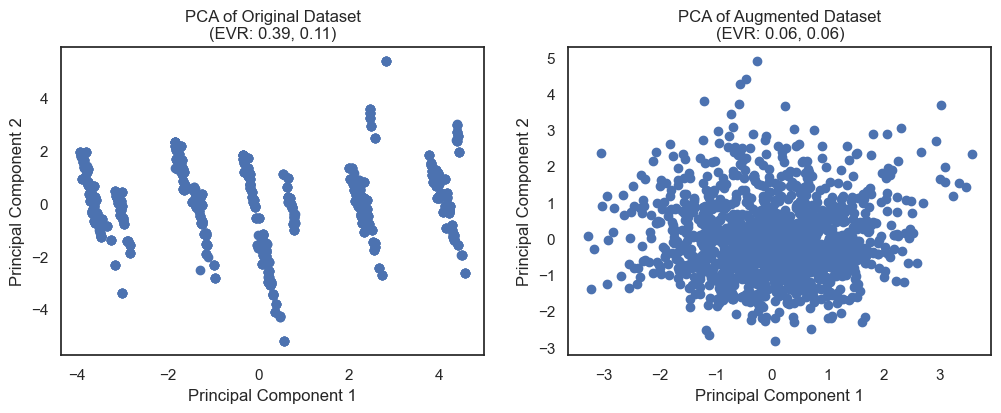

In [24]:
dataset1 = expDF.copy()
dataset1['velocity'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['velocity'].values]
dataset1['t'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['t'].values]
dataset1['t0'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['t0'].values]

# Separate the features (X) from the target (y)
X1 = dataset1.iloc[:, :-1].values

dataset2 = samples.copy()
dataset2['velocity'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['velocity'].values]
dataset2['t'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['t'].values]
dataset2['t0'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['t0'].values]

# Separate the features (X) from the target (y)
X2 = dataset2.iloc[:, :-1].values

# Standardize the features
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

# Perform PCA for the first dataset
pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(X1)

# Perform PCA for the second dataset
pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(X2)

# Examine the eigenvalues and explained variance ratio for the first dataset
print('EVR for Dataset 1:', pca1.explained_variance_ratio_)

# Examine the eigenvalues and explained variance ratio for the second dataset
print('EVR for Dataset 2:', pca2.explained_variance_ratio_)

# Visualize the data in 2D using the principal components
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for the first dataset
axs[0].scatter(principal_components1[:, 0], principal_components1[:, 1])
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_title('PCA of Original Dataset\n(EVR: {:.2f}, {:.2f})'.format(*pca1.explained_variance_ratio_))

# Plot for the second dataset
axs[1].scatter(principal_components2[:, 0], principal_components2[:, 1])
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title('PCA of Augmented Dataset\n(EVR: {:.2f}, {:.2f})'.format(*pca2.explained_variance_ratio_))


plt.show()

In [15]:
# overall, the generated data seems to be more than adequate and similar to the real one
# however, I think there can be an issue with the spatial relation in the generated data
# I am not sure if the neural net really learns the relation between the coordinates and time
gen1Report = evaluate_quality(
    expDF,
    samples,
    expMetadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 12.29it/s]



Overall Quality Score: 89.39%

Properties:
Column Shapes: 93.31%
Column Pair Trends: 85.46%


In [16]:
import table_evaluator as tabeval

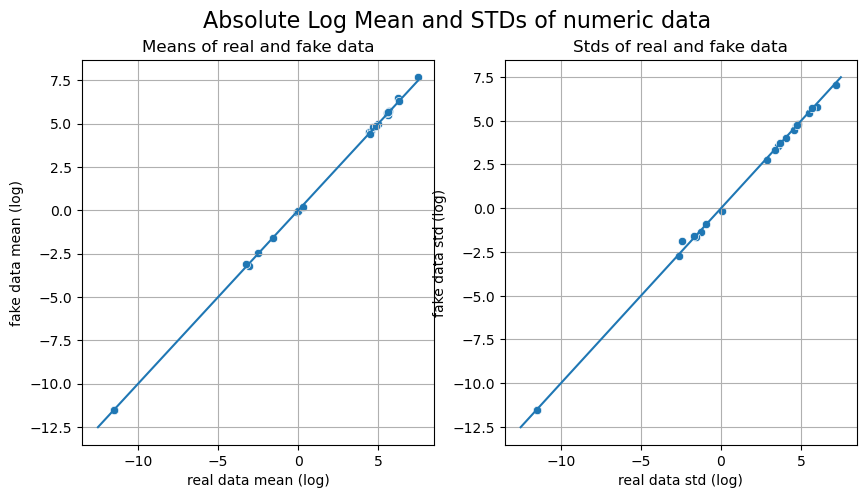

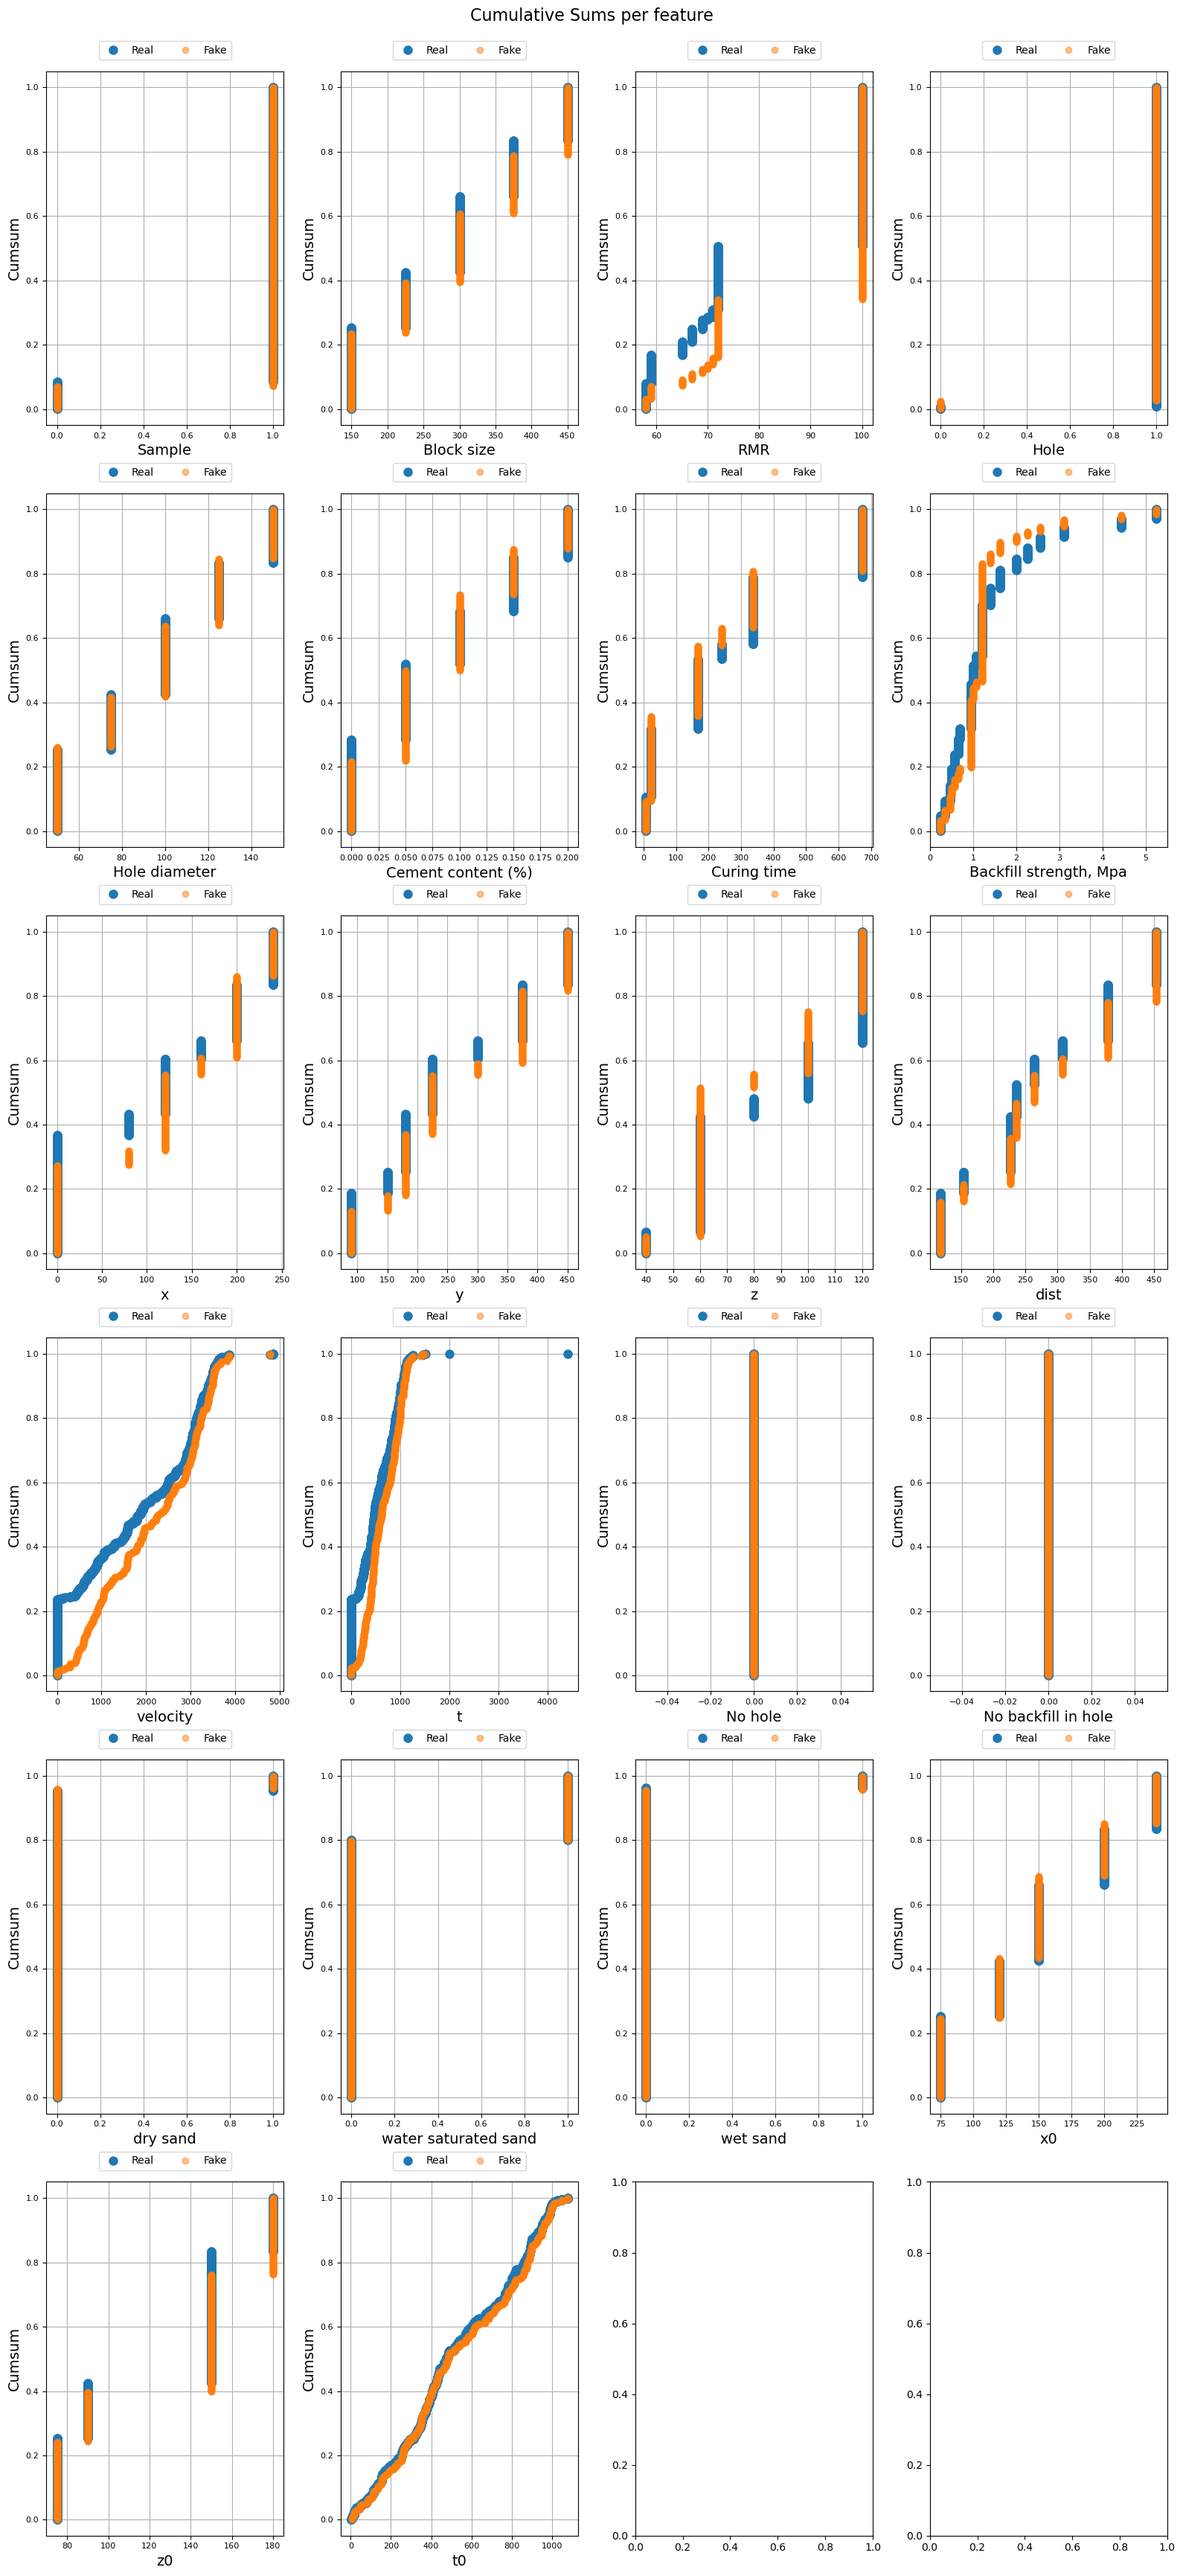

/Users/daniyar/opt/miniconda3/envs/compchem/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/Users/daniyar/opt/miniconda3/envs/compchem/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/Users/daniyar/opt/miniconda3/envs/compchem/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

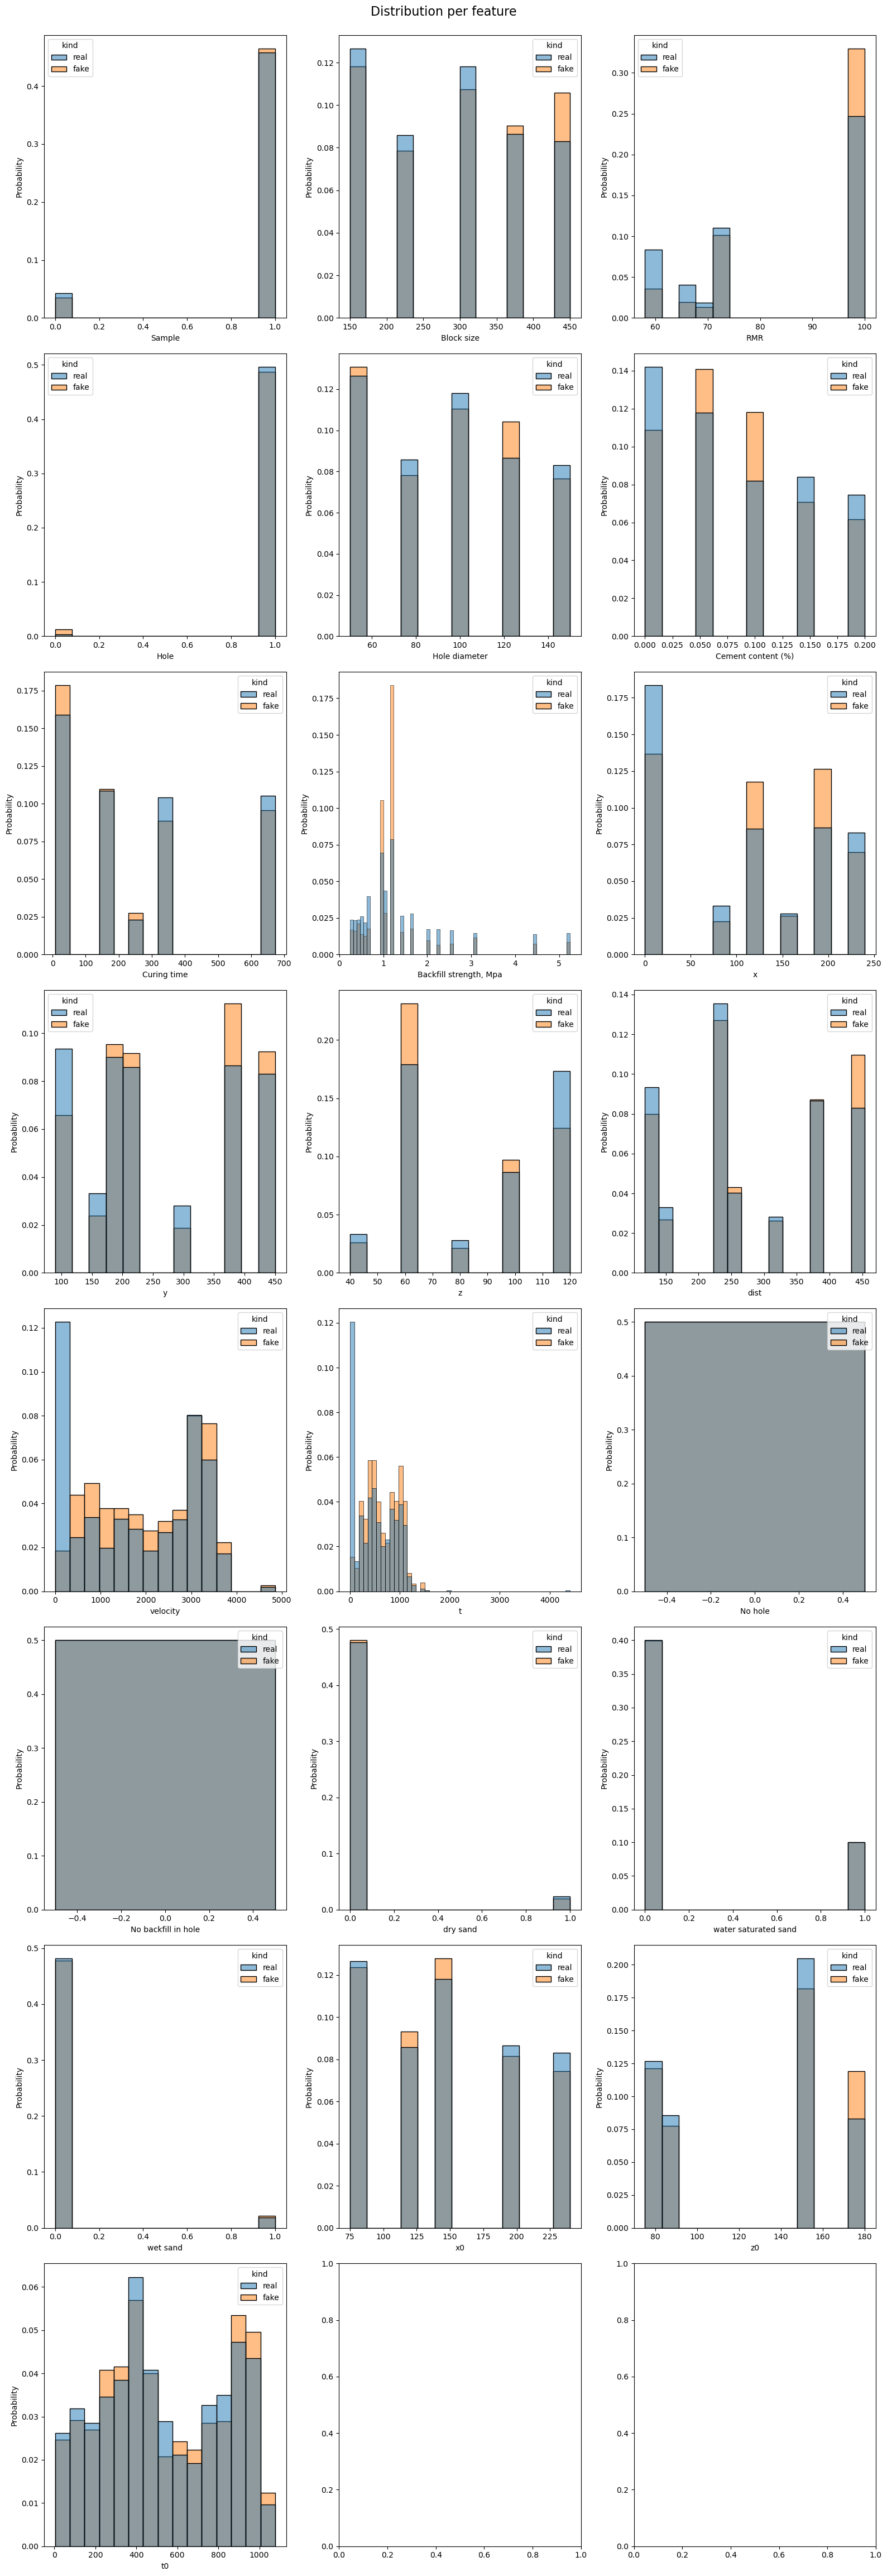

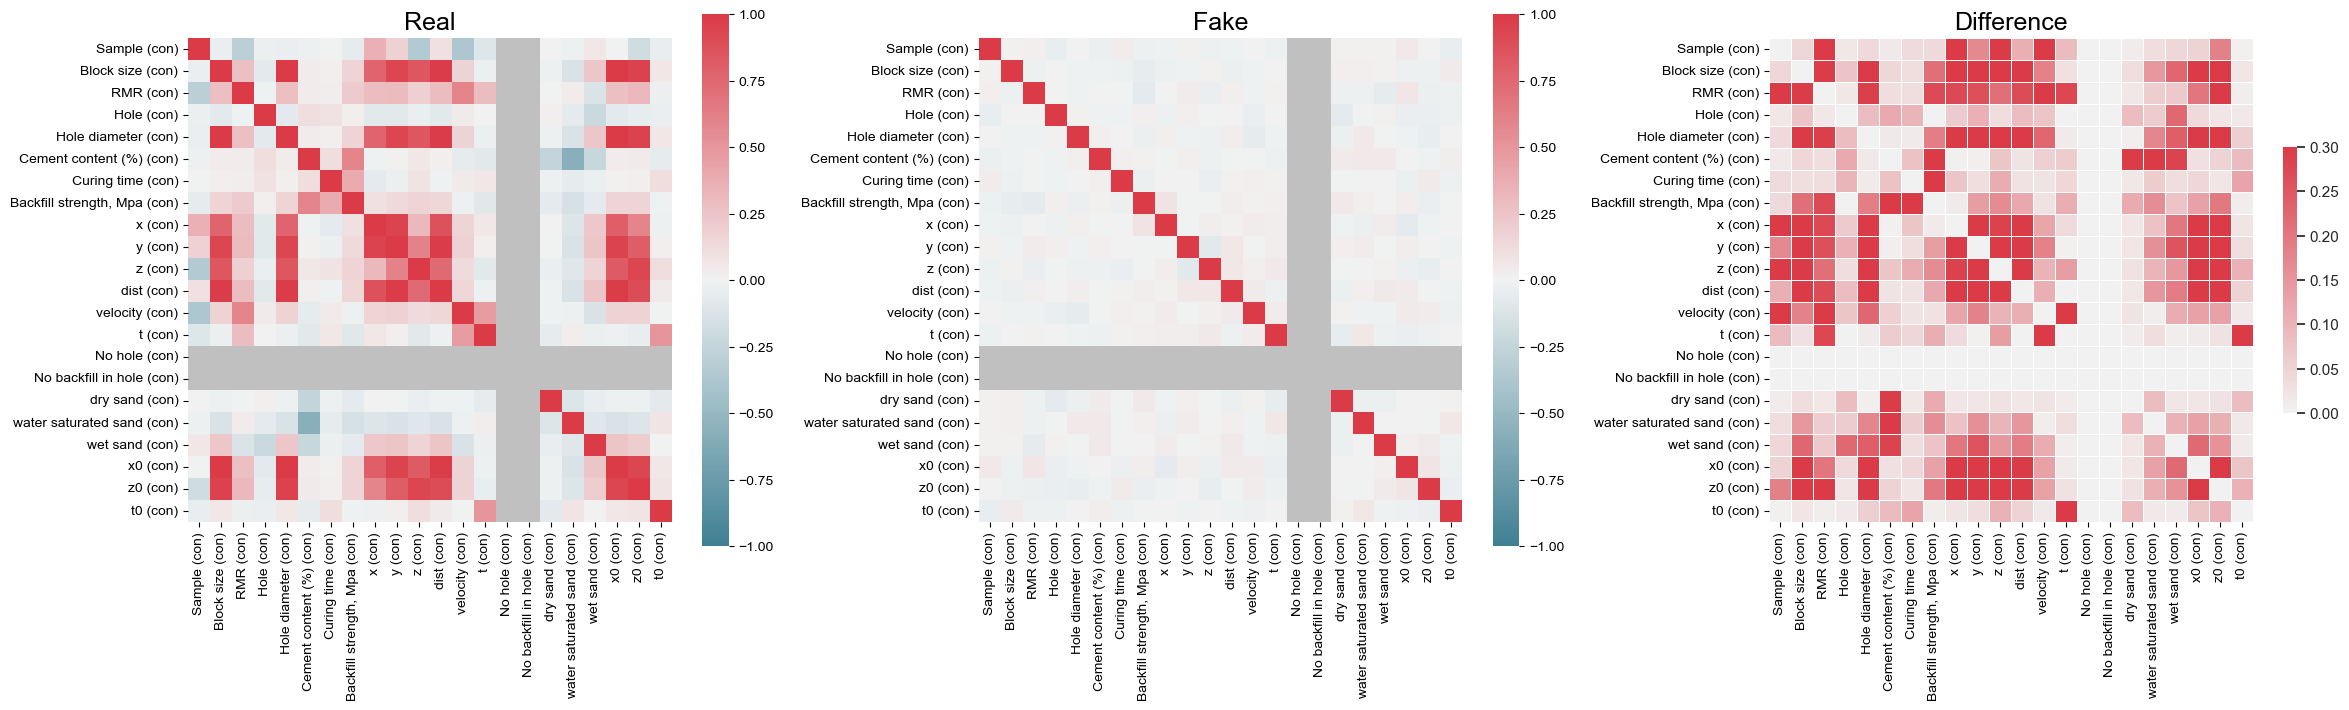

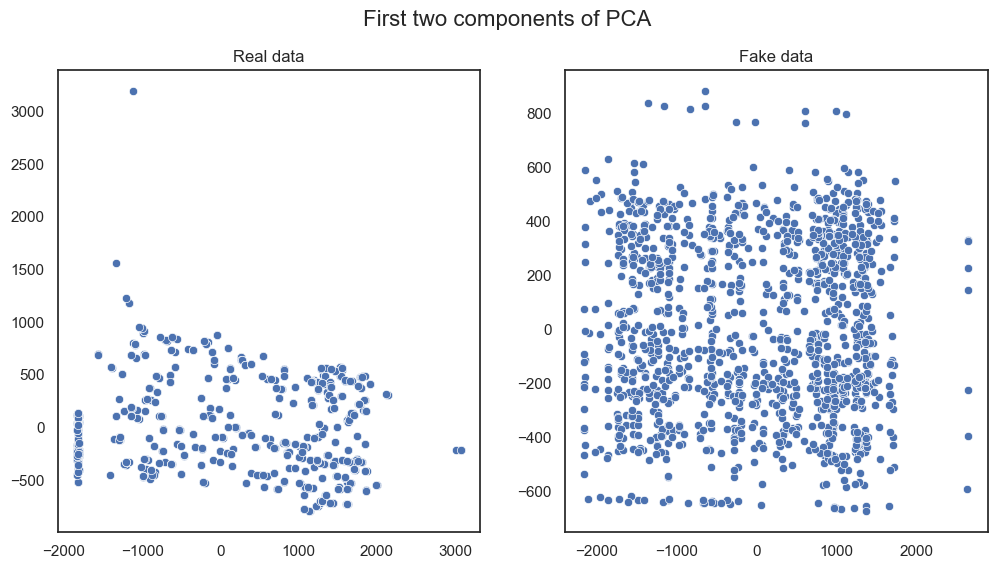

In [17]:
# more evaluation and comparison
# overall, again, fine
# PCAs are, however, totally different. from what I read, it is normal, since we have 23 dimensions, it is really hard
# to replicate everything

table_evaluator = tabeval.TableEvaluator(expDF, samples)
table_evaluator.visual_evaluation()

In [ ]:
# Making a custom CTGAN model to try to improve the score

In [18]:
model = ctgan.CTGAN(
    epochs=5,
    batch_size=10,
    generator_dim=(64, 64, 64),
    discriminator_dim=(64, 64, 64),
    verbose=True
)

In [19]:
model.fit(expDF, cols)

Epoch 1, Loss G:  2.1963,Loss D: -0.3225
Epoch 2, Loss G:  3.2789,Loss D: -0.7548
Epoch 3, Loss G:  2.9196,Loss D:  0.2834
Epoch 4, Loss G:  3.4179,Loss D:  0.2034
Epoch 5, Loss G:  3.4649,Loss D:  0.3071


In [25]:
newsamples = model.sample(1300)

In [26]:
gen2Report = evaluate_quality(
    expDF,
    newsamples,
    expMetadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 12.38it/s]



Overall Quality Score: 89.48%

Properties:
Column Shapes: 93.43%
Column Pair Trends: 85.54%


EVR for Dataset 1: [0.38634206 0.11364401]
EVR for Dataset 2: [0.07296706 0.05986099]


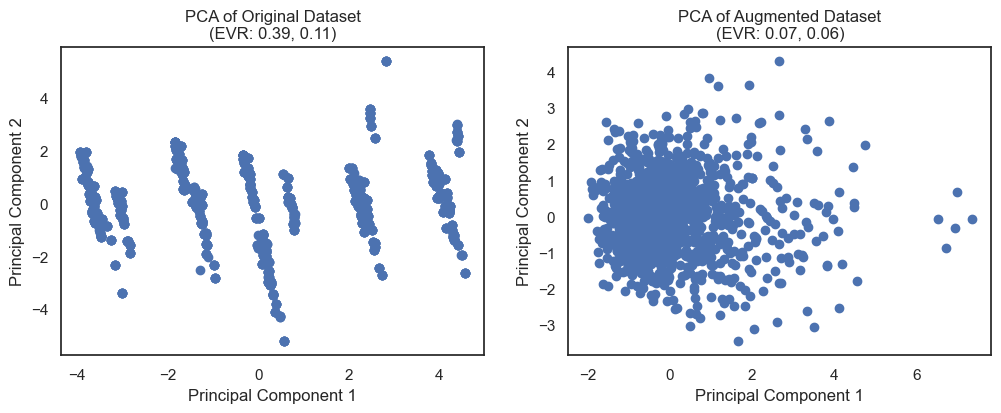

In [27]:
dataset1 = expDF.copy()
dataset1['velocity'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['velocity'].values]
dataset1['t'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['t'].values]
dataset1['t0'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset1['t0'].values]

# Separate the features (X) from the target (y)
X1 = dataset1.iloc[:, :-1].values

dataset2 = newsamples.copy()
dataset2['velocity'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['velocity'].values]
dataset2['t'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['t'].values]
dataset2['t0'] = [float(str(val).replace(' ','').replace(',','.')) for val in dataset2['t0'].values]

# Separate the features (X) from the target (y)
X2 = dataset2.iloc[:, :-1].values

# Standardize the features
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

# Perform PCA for the first dataset
pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(X1)

# Perform PCA for the second dataset
pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(X2)

# Examine the eigenvalues and explained variance ratio for the first dataset
print('EVR for Dataset 1:', pca1.explained_variance_ratio_)

# Examine the eigenvalues and explained variance ratio for the second dataset
print('EVR for Dataset 2:', pca2.explained_variance_ratio_)

# Visualize the data in 2D using the principal components
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for the first dataset
axs[0].scatter(principal_components1[:, 0], principal_components1[:, 1])
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_title('PCA of Original Dataset\n(EVR: {:.2f}, {:.2f})'.format(*pca1.explained_variance_ratio_))

# Plot for the second dataset
axs[1].scatter(principal_components2[:, 0], principal_components2[:, 1])
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title('PCA of Augmented Dataset\n(EVR: {:.2f}, {:.2f})'.format(*pca2.explained_variance_ratio_))

plt.show()

In [ ]:
table_evaluator = tabeval.TableEvaluator(expDF, newsamples)
table_evaluator.visual_evaluation()

In [ ]:
frames = [expDF, samples]
frames2 = [expDF, newsamples]
gen1res = pd.concat(frames)
gen2res = pd.concat(frames2)
gen1res.to_csv("ctgangen1.csv", index = False)
gen2res.to_csv("ctgangen2.csv", index = False)